In [1]:
import numpy as np
import pandas as pd
import nltk 
import random
from nltk.corpus import stopwords
from nltk import FreqDist
from bs4 import BeautifulSoup
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/byzeng/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
df=pd.read_csv('Reviews.csv')
df

Id   ProductId          UserId  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW   
1            2  B00813GRG4  A1D87F6ZCVE5NK   
2            3  B000LQOCH0   ABXLMWJIXXAIN   
3            4  B000UA0QIQ  A395BORC6FGVXV   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T   
5            6  B006K2ZZ7K   ADT0SRK1MGOEU   
6            7  B006K2ZZ7K  A1SP2KVKFXXRU1   
7            8  B006K2ZZ7K  A3JRGQVEQN31IQ   
8            9  B000E7L2R4  A1MZYO9TZK0BBI   
9           10  B00171APVA  A21BT40VZCCYT4   
10          11  B0001PB9FE  A3HDKO7OW0QNK4   
11          12  B0009XLVG0  A2725IB4YY9JEB   
12          13  B0009XLVG0   A327PCT23YH90   
13          14  B001GVISJM  A18ECVX2RJ7HUE   
14          15  B001GVISJM  A2MUGFV2TDQ47K   
15          16  B001GVISJM  A1CZX3CP8IKQIJ   
16          17  B001GVISJM  A3KLWF6WQ5BNYO   
17          18  B001GVISJM   AFKW14U97Z6QO   
18          19  B001GVISJM  A2A9X58G2GTBLP   
19          20  B001GVISJM  A3IV7CL2C13K2U   
20          21  B001GVISJM  A1WO0KGLPR5PV6   
21          22  B001GVISJM   AZOF9E17RGZH8   
22          23  B001GVISJM   ARYVQL4N737A1   
23          24  B001GVISJM   AJ613OLZZUG7V   
24          25  B001GVISJM  A22P2J09NJ9HKE   
25          26  B001GVISJM  A3FONPR03H3PJS   
26          27  B001GVISJM  A3RXAU2N8KV45G   
27          28  B001GVISJM   AAAS38B98HMIK   
28          29  B00144C10S  A2F4LZVGFLD1OB   
29          30  B0001PB9FY  A3HDKO7OW0QNK4   
...        ...         ...             ...   
568424  568425  B001FPT1WM  A291HTT117RVS9   
568425  568426  B001FPT1WM   A1TRJQBYQFZW4   
568426  568427  B001FPT1WM  A2F25C6QCKJ3HL   
568427  568428  B001FPT1WM   A7VLVCQJIROTF   
568428  568429  B001FPT1WM  A1YGG6T4YJZWC1   
568429  568430  B001FPT1WM   AW7HIV8I53FE4   
568430  568431  B001FPT1WM   A1XDMZMMOAMR7   
568431  568432  B003XUL27E  A32Y0419QFGVHM   
568432  568433  B003XUL27E  A1YKXVGAIA8952   
568433  568434  B003XUL27E  A1JUG9WCN1A52Z   
568434  568435  B003XUL27E   ABGQPE97ZVYJ3   
568435  568436  B003XUL27E  A2PSB4WQHH46HN   
568436  568437  B000NY4SAG  A3ODWHC3EMMWTT   
568437  568438  B000NY4SAG  A1RKKPSXF9QIZF   
568438  568439  B000NY4SAG  A3M89SF0SSOGBK   
568439  568440  B000NY4SAG  A34GDV49ZZQKXG   
568440  568441  B005ZC0RRO  A2TO5R8QLIITEF   
568441  568442  B000NY8O9M   AZRHU8CP5XKMF   
568442  568443  B006T7TKZO  A3BOURUK79CYY5   
568443  568444  B000H7K114  A2AGSSZR9V7XST   
568444  568445  B001EO7N10  A2SD7TY3IOX69B   
568445  568446  B001EO7N10  A2E5C8TTAED4CQ   
568446  568447  B001EO7N10  A2P9W8T7NTLG2Z   
568447  568448  B001EO7N10   APWCOAVILK94B   
568448  568449  B001EO7N10  A1F6BHEYB7R6R7   
568449  568450  B001EO7N10  A28KG5XORO54AY   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5   
568451  568452  B004I613EE  A121AA1GQV751Z   
568452  568453  B004I613EE   A3IBEVCTXKNOH   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC   

                                 ProfileName  HelpfulnessNumerator  \
0                                 delmartian                     1   
1                                     dll pa                     0   
2            Natalia Corres "Natalia Corres"                     1   
3                                       Karl                     3   
4              Michael D. Bigham "M. Wassir"                     0   
5                             Twoapennything                     0   
6                          David C. Sullivan                     0   
7                         Pamela G. Williams                     0   
8                                   R. James                     1   
9                              Carol A. Reed                     0   
10                              Canadian Fan                     1   
11                    A Poeng "SparkyGoHome"                     4   
12                                        LT                     1   
13                           willie "roadie"                     2   
14                       Lynrie "Oh HELL no"                     4   
15                              Brian A

In [3]:
df.info

<bound method DataFrame.info of             Id   ProductId          UserId  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW   
1            2  B00813GRG4  A1D87F6ZCVE5NK   
2            3  B000LQOCH0   ABXLMWJIXXAIN   
3            4  B000UA0QIQ  A395BORC6FGVXV   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T   
5            6  B006K2ZZ7K   ADT0SRK1MGOEU   
6            7  B006K2ZZ7K  A1SP2KVKFXXRU1   
7            8  B006K2ZZ7K  A3JRGQVEQN31IQ   
8            9  B000E7L2R4  A1MZYO9TZK0BBI   
9           10  B00171APVA  A21BT40VZCCYT4   
10          11  B0001PB9FE  A3HDKO7OW0QNK4   
11          12  B0009XLVG0  A2725IB4YY9JEB   
12          13  B0009XLVG0   A327PCT23YH90   
13          14  B001GVISJM  A18ECVX2RJ7HUE   
14          15  B001GVISJM  A2MUGFV2TDQ47K   
15          16  B001GVISJM  A1CZX3CP8IKQIJ   
16          17  B001GVISJM  A3KLWF6WQ5BNYO   
17          18  B001GVISJM   AFKW14U97Z6QO   
18          19  B001GVISJM  A2A9X58G2GTBLP   
19          20  B001GVISJM  A3IV7CL2C13K2U   
20

In [4]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [5]:
df1 = df.sample(n=20000,frac=None, replace=False, weights=None, random_state=1, axis=None)
df1

Id   ProductId          UserId  \
288312  288313  B000ENUC3S   AN66F3Q4QNU43   
431726  431727  B002TMV3CG  A3G007LQX6KGOD   
110311  110312  B004867T24  A11LNY2OLQSUSV   
91855    91856  B004U7KPY0  A1QCYVHWO5934U   
338855  338856  B000FD78R0  A30U2QQN2FFHE9   
243608  243609  B0059X9A6I   AUDQL0QLM3Y58   
152343  152344  B000LKZD4W  A1QGQ6BDB5PR2X   
336202  336203  B000BRR8VQ   A1GE2Q2WR6G9G   
488611  488612  B004JQVAVO  A1OH8NY6IBSDJ7   
103618  103619  B0083L5F8K  A2KXPOM62YFOBT   
420252  420253  B001EPPC80  A3G7ANA9HW69M5   
349113  349114  B0002QEIF0   AQ492CE49WYC6   
443517  443518  B000634FVG   AX3O3ANDPKDIF   
498073  498074  B000BYAECY   ACTI7K4OERSRT   
163367  163368  B000CQID1A  A28UINBMQPCKDV   
276371  276372  B0018Q2N3C  A2TUJI1HX80SVC   
411049  411050  B0050X8EK0  A3JN0FHDFURCDL   
516321  516322  B000H1217M  A2O9N82I49GZ4P   
424829  424830  B0041CIP3M  A21VGNU5959O85   
195423  195424  B002I39NYQ  A1HAW3196D85ID   
109671  109672  B0030VJ97Q  A3FIV3X7H4VLI7   
407943  407944  B008UD1W6K  A2XQWXRSJ0Q04I   
409829  409830  B004LKY7NG  A1KY25HG3D9NWB   
404362  404363  B000LKZEO6  A3H7DJ8TDWZTIC   
219292  219293  B00099XO14  A1Z54EM24Y40LL   
361879  361880  B006N3HZ6K   A67YO0RRC61AM   
114135  114136  B004FELBH8  A36K2N527TXXJN   
271988  271989  B004VLVQZC  A3BDO5NTTNDG7A   
302764  302765  B000ZH04L8  A1NPHWZRB228G9   
475002  475003  B0026WL1F8  A1EU1MI5Q0J0WN   
...        ...         ...             ...   
362654  362655  B003JA5KKS  A1K277HLLHX0CA   
408376  408377  B00099XNZ6  A1PQRBDQG7XEPB   
266403  266404  B0097SUJGQ   AM5JP8SLOUF3O   
552237  552238  B00112IEJK  A3C2SYTHQNTJA4   
344392  344393  B0026KNQSA  A11L5M4MJP00UW   
286813  286814  B0006IYHU0  A3JELI1UH620FO   
139930  139931  B0051WBPQU  A1J78FRXYMZTCE   
254532  254533  B000R923TU  A36614H8BSX4B1   
221881  221882  B000I6PYAC   ANUBBRUV40AQP   
59021    59022  B002HQLY7S   ARVASUPZHS2R3   
551471  551472  B0007V1164  A12HO2B007IIN4   
288242  288243  B000ENUC3S   A3BUFWY7JGT4X   
349378  349379  B000CQC064   A3Q9QBDOA655L   
302567  302568  B000BF3AJ2  A3HJDGAU2SB8VL   
547864  547865  B006HYLW32   A7RFDGVXDYQLJ   
200646  200647  B001EO5UVK  A14XY6XHL3EXRB   
541852  541853  B000FKQD42   AB708TB00DZF6   
249097  249098  B0032CJYM8  A19C2AS1H3ZGXY   
84161    84162  B0026KOZAI  A23UC4XIUK6LY1   
188971  188972  B001E0TBA0   AC8NEZHM41IW2   
490034  490035  B002UV352C  A3CACMP9UQEF7C   
532362  532363  B000ZSTOL8  A2WLNSZ9U0T1S3   
250240  250241  B0027UYT4O  A24MJ3KLA26QWQ   
414829  414830  B005VOOLXM  A1LA4K5JF78BER   
86848    86849  B004VNB2K4  A2OVVBSKXRKNUK   
214617  214618  B001KQAR24   A6ZVELVNSJ0UQ   
483013  483014  B002L8XKZG   AR0IJ3K6DQG1B   
43829    43830  B001EQ5JLE  A1POWCMC15A723   
404185  404186  B0006Q98QU  A11X4R2NUJAE94   
389778  389779  B0008IT4OM  A2CL818RN52NWN   

                                ProfileName  HelpfulnessNumerator  \
288312                        Donna Speaker                     0   
431726                             SevereWX                     0   
110311                          M. Castillo                     0   
91855               PistolaMia "PistolaMia"                     0   
338855                          J. Amicucci                     2   
243608                         chuck harris                     0   
152343                       Carolyn McCray                     1   
336202                            tech geek                     0   
488611                     J. P. Delese Jr.                     1   
103618                       C. Daughtridge                     0   
420252                                  Ali                     0   
349113                                 taft                     2   
443517    blackholesun1Girl "blackholesun1"                     1   
498073                               Smiley                     2   
163367                                  doc                     0   
276371                          Edward King            

In [6]:
df1['Text']

288312    I love the Cherry Pie Lara bar.  Best and tast...
431726    Melitta Cafe COllection Blanc et Noir coffee h...
110311    my girls absolutely loved this tuna. they were...
91855     The vendor is fast and dependable. The tea is ...
338855    UPDATE - 8/9/2010<br />A lot can happen in jus...
243608    I have pretty much tried them all. The dark ch...
152343    Just be forewarned it is a bit "moist."  Have ...
336202    Both of my mixed terrier dogs prefer this trea...
488611    Made this coffee with a percolator maybe that ...
103618    This was just the basic ingredients that i cou...
420252    It is an actual biscuit! Not a cookie! They tr...
349113    I have made stuffed grape leaves quite a few t...
443517    My dog Annie had surgery about 2 months ago an...
498073    My dog is crazy for these sticks! He loves the...
163367    great product will buy them again.my little do...
276371    I'm a diabetic that has been using Dreamfields...
411049    I LOVE THIS. Also saw this on 

In [7]:
review_food = ("".join(i for i in df1['Text'])).replace('<br />',"")
review_food


'I love the Cherry Pie Lara bar.  Best and tasty bar for when my sugar is low.  I recomend this Bar for diabetics low sugar only, as the carbs are about 30 for the bar.Melitta Cafe COllection Blanc et Noir coffee has a very smooth, refined armoma you notice as soon as you open up the package. That same aroma translates well throughout the brewing process and remains once poured into your cup. Once you taste it, you will find that the flavor is bold yet smooth, it has a slightly dark, powerful flavor without any of the coarseness or bitterness. I went directly from one of those high-pressure coffee pod brewing systems to using the Melitta in a percolator, and it seems Melitta has helped me find my way back to a better cup of coffee.my girls absolutely loved this tuna. they were in heaven and couldn\'t get enough of this tasty treat. A bit pricey since I do have 4 cats and the pack went super fast giving each of them a treatThe vendor is fast and dependable. The tea is simply the best wa

In [8]:
tokens = nltk.word_tokenize(review_food)
type(tokens)

list

In [9]:
words1 = [w.lower() for w in tokens]
words2 = [w for w in words1 if w.isalpha()]

In [10]:
from nltk.corpus import stopwords

stopwords = stopwords.words('english')

In [11]:
words_nostopwords = [w for w in words2 if w not in stopwords]

In [14]:
freq_nostw = FreqDist(words_nostopwords)

In [16]:
sorted_freq_nostw = sorted(freq_nostw.items(),key = lambda k:k[1], reverse = True)
sorted_freq_nostw[0:30]

[('like', 9112),
 ('good', 6857),
 ('one', 5962),
 ('taste', 5841),
 ('coffee', 5762),
 ('great', 5489),
 ('product', 4954),
 ('flavor', 4891),
 ('would', 4826),
 ('food', 4626),
 ('tea', 4492),
 ('love', 4346),
 ('get', 3826),
 ('really', 3521),
 ('much', 3290),
 ('also', 3096),
 ('little', 2883),
 ('use', 2883),
 ('amazon', 2861),
 ('tried', 2702),
 ('time', 2651),
 ('even', 2630),
 ('find', 2622),
 ('buy', 2599),
 ('make', 2587),
 ('best', 2544),
 ('price', 2532),
 ('dog', 2455),
 ('eat', 2439),
 ('better', 2416)]

In [17]:
#Use Porter Stemmer
porter = nltk.PorterStemmer()
stem1 = [porter.stem(w) for w in words_nostopwords]

In [18]:
freq1 = FreqDist(stem1)

In [19]:
sorted_freq1 = sorted(freq1.items(),key = lambda k: k[1], reverse = True)
sorted_freq1[0:30]

[('like', 10210),
 ('tast', 8985),
 ('flavor', 7315),
 ('good', 7025),
 ('one', 6491),
 ('love', 6386),
 ('use', 6110),
 ('coffe', 6097),
 ('product', 6041),
 ('tri', 5862),
 ('food', 5509),
 ('great', 5492),
 ('tea', 4996),
 ('get', 4973),
 ('would', 4826),
 ('make', 4472),
 ('eat', 3799),
 ('dog', 3774),
 ('buy', 3680),
 ('realli', 3521),
 ('time', 3325),
 ('much', 3290),
 ('order', 3158),
 ('bag', 3115),
 ('also', 3096),
 ('price', 2913),
 ('littl', 2884),
 ('amazon', 2865),
 ('find', 2863),
 ('even', 2777)]

In [27]:
freq1.plot(30)

In [21]:
#use WordNet Lemmatizer

wnl = nltk.WordNetLemmatizer()
stem2 = [wnl.lemmatize(w) for w in words_nostopwords]
freq2 = FreqDist(stem2)
sorted_freq2 = sorted(freq2.items(),key = lambda k: k[1], reverse = True)
sorted_freq2[0:30]

[('like', 9485),
 ('taste', 7381),
 ('good', 6922),
 ('one', 6490),
 ('flavor', 6165),
 ('coffee', 6097),
 ('product', 6007),
 ('love', 5581),
 ('food', 5509),
 ('great', 5489),
 ('tea', 4996),
 ('would', 4826),
 ('get', 4217),
 ('make', 3877),
 ('dog', 3774),
 ('really', 3521),
 ('much', 3290),
 ('time', 3238),
 ('also', 3096),
 ('bag', 3083),
 ('little', 2883),
 ('use', 2883),
 ('amazon', 2865),
 ('price', 2705),
 ('tried', 2702),
 ('find', 2649),
 ('even', 2633),
 ('buy', 2620),
 ('best', 2545),
 ('eat', 2439)]

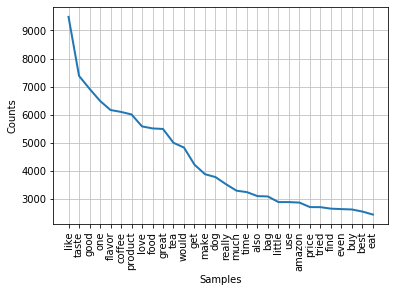

In [22]:
freq2.plot(30)

In [23]:
#Use POS approach and only focus on JJ

POS_tags = nltk.pos_tag(tokens)
POS_tags

[('I', 'PRP'),
 ('love', 'VBP'),
 ('the', 'DT'),
 ('Cherry', 'NNP'),
 ('Pie', 'NNP'),
 ('Lara', 'NNP'),
 ('bar', 'NN'),
 ('.', '.'),
 ('Best', 'NNP'),
 ('and', 'CC'),
 ('tasty', 'JJ'),
 ('bar', 'NN'),
 ('for', 'IN'),
 ('when', 'WRB'),
 ('my', 'PRP$'),
 ('sugar', 'NN'),
 ('is', 'VBZ'),
 ('low', 'JJ'),
 ('.', '.'),
 ('I', 'PRP'),
 ('recomend', 'VBP'),
 ('this', 'DT'),
 ('Bar', 'NNP'),
 ('for', 'IN'),
 ('diabetics', 'NNS'),
 ('low', 'JJ'),
 ('sugar', 'NN'),
 ('only', 'RB'),
 (',', ','),
 ('as', 'IN'),
 ('the', 'DT'),
 ('carbs', 'NN'),
 ('are', 'VBP'),
 ('about', 'IN'),
 ('30', 'CD'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('bar.Melitta', 'NN'),
 ('Cafe', 'NNP'),
 ('COllection', 'NNP'),
 ('Blanc', 'NNP'),
 ('et', 'FW'),
 ('Noir', 'NNP'),
 ('coffee', 'NN'),
 ('has', 'VBZ'),
 ('a', 'DT'),
 ('very', 'RB'),
 ('smooth', 'JJ'),
 (',', ','),
 ('refined', 'JJ'),
 ('armoma', 'NN'),
 ('you', 'PRP'),
 ('notice', 'VBP'),
 ('as', 'RB'),
 ('soon', 'RB'),
 ('as', 'IN'),
 ('you', 'PRP'),
 ('open', 'VBP'),
 ('up

In [24]:

POS_tag_listN = [(word,tag) for (word,tag) in POS_tags if tag == 'NN']

In [25]:
tag_freq = nltk.FreqDist(POS_tag_listN)
sorted_tag_freq = sorted(tag_freq.items(), key = lambda k:k[1], reverse = True)
sorted_tag_freq[0:30]

[(('coffee', 'NN'), 5289),
 (('product', 'NN'), 4844),
 (('flavor', 'NN'), 4742),
 (('food', 'NN'), 4419),
 (('taste', 'NN'), 4214),
 (('tea', 'NN'), 3933),
 (('time', 'NN'), 2609),
 (('price', 'NN'), 2461),
 (('dog', 'NN'), 2215),
 (('bag', 'NN'), 1921),
 (('water', 'NN'), 1883),
 (('chocolate', 'NN'), 1770),
 (('cup', 'NN'), 1665),
 (('box', 'NN'), 1661),
 (('way', 'NN'), 1623),
 (('sugar', 'NN'), 1546),
 (('order', 'NN'), 1522),
 (('day', 'NN'), 1462),
 (('something', 'NN'), 1390),
 (('store', 'NN'), 1384),
 (('bit', 'NN'), 1322),
 (('lot', 'NN'), 1233),
 (('brand', 'NN'), 1196),
 (('stuff', 'NN'), 1184),
 (('cat', 'NN'), 1177),
 (('snack', 'NN'), 1079),
 (('quality', 'NN'), 1073),
 (('milk', 'NN'), 1017),
 (('thing', 'NN'), 997),
 (('treat', 'NN'), 946)]

In [26]:
tag_freq.plot(30)